# HW3

## Decision Trees

#YASWANTH KUMAR MACHAVARAPU






### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Let's check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Run and check the outputs.

### Confusion matrix plot

In [33]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


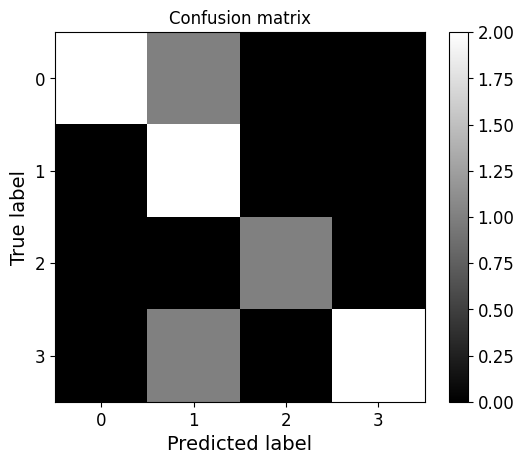

In [34]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [35]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


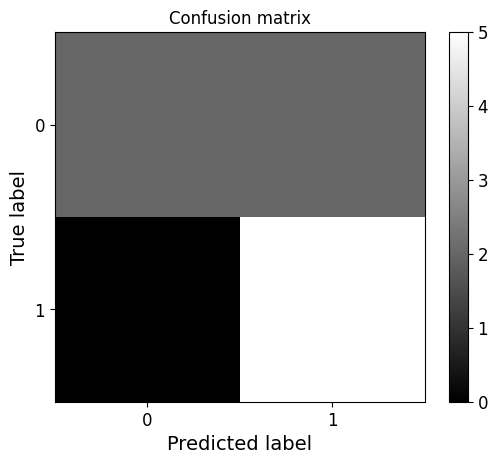

In [36]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [37]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model
#### use pandas  pd.plotting.scatter_matrix

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

<ipython-input-38-2d481a21f27e>:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


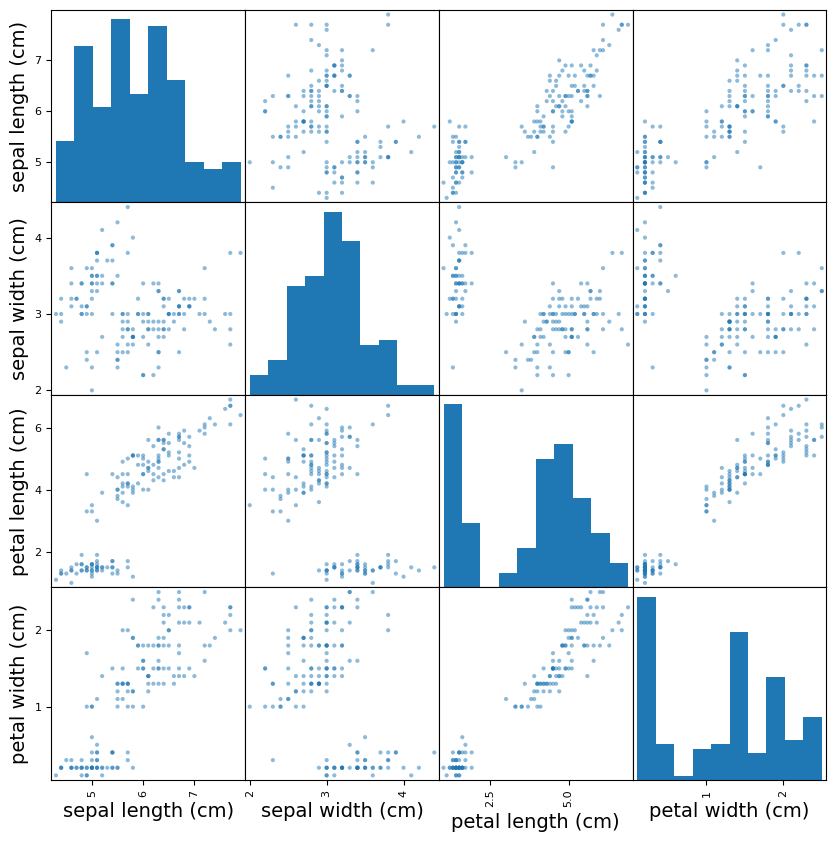

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('/content/Iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()



# Decision Trees

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine.

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)

### Split the data to training and testing

In [40]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [41]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [42]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


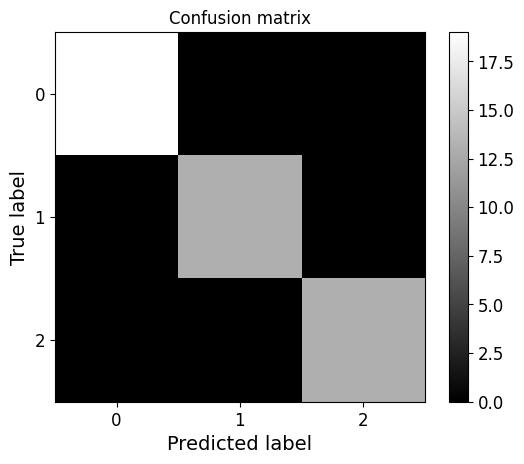

In [43]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [44]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [45]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree
notice that using graphviz is not the only method to draw decision tree.  You can also use  sklearn.tree.plot_tree

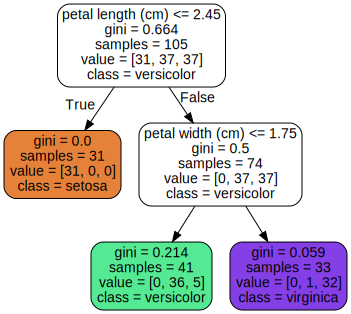

In [46]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## k-Cross Validation

- using sklearn corss_val_score() function

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

## k-Cross Validation

- using KFold function with freedom

In [48]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf)


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [49]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Decision Tree boundary Visualization

In [50]:
## Example  This function is meant to be used for other data besides iris.

Saving figure decision_tree_decision_boundaries_plot


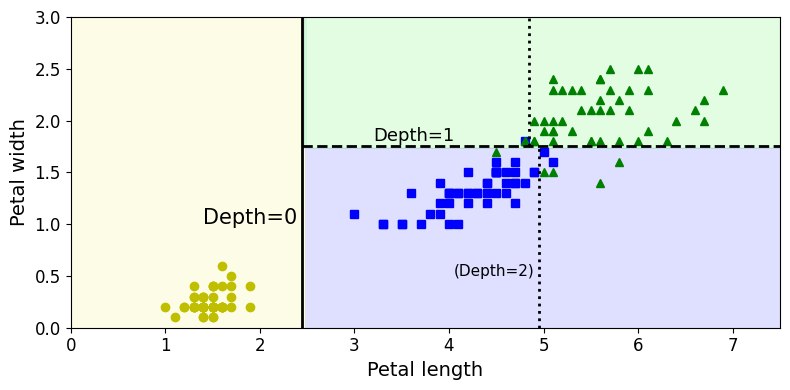

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [52]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [53]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [54]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower


array([[4.8, 1.8]])

In [55]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


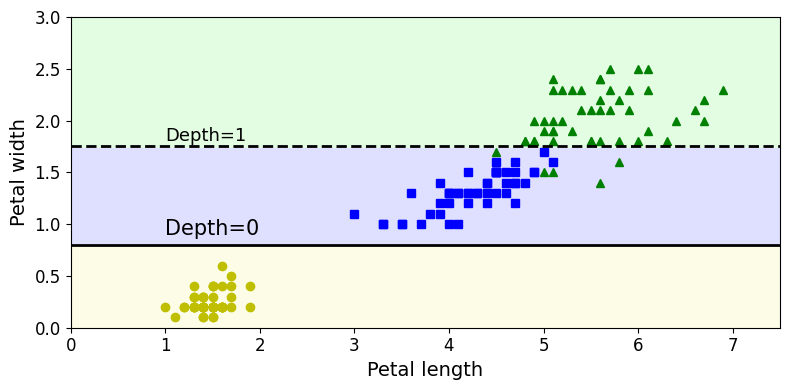

In [56]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# =========  HW3 =============

##  ===============================

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results.

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results.

In [117]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [118]:
# Split data into testing and training - same as code above
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [119]:
# Create decision tree and set criterion to information gain (entropy)
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

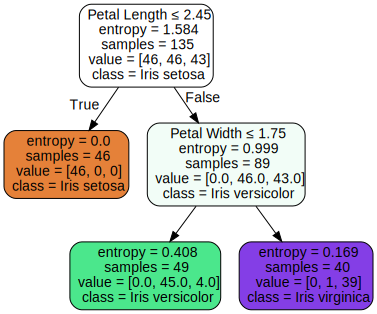

In [142]:
import numpy as np
from IPython.display import display
import graphviz
from sklearn.tree import export_graphviz


class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']  # Example class names

# Export tree visualization with proper class names
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=['Petal Length', 'Petal Width'],
                           class_names=class_names,  # Use the desired class names
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)


In [143]:
# Apply 10-fold cross validation score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(tree_clf, X, y, cv=10, scoring='accuracy')


print("Cross-validation scores:", cv_scores)

Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]


In [144]:
# Parse and bin the data into   10 folds for validation
  # import k-fold validation

  # Define the split - into 10 folds

  # returns the number of splitting iterations in the cross-validator
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=None)
print(f"Number of splits/iterations: {kf.get_n_splits()}")



Number of splits/iterations: 10


In [145]:
# Apply the 10-fold cross validation we've created
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy", random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.80      1.00      0.89         4
   virginica       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.93      0.93      0.93        15
weighted avg       0.95      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         2
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         8

    accuracy        

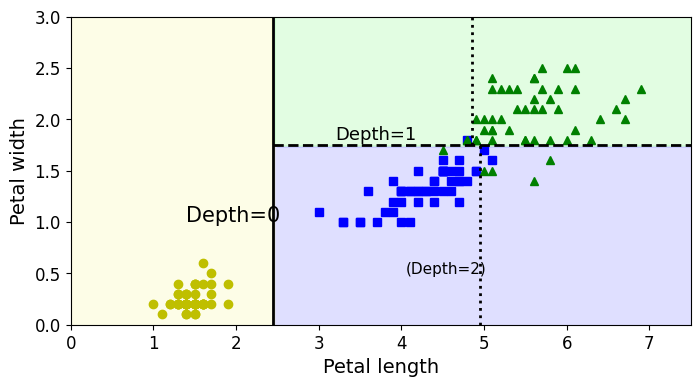

In [124]:
# Plot the decision boundry graph for the entropy model

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree_clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot")
plt.show()



#explain what is the relationship between the drawn decision bondries and gini index

#explain what is the relationship between the drawn decision bondries and gini index
The Gini index is used in decision trees to measure how mixed the classes are in a group of data. When building the tree, the algorithm tries to find the best way to split the data so that the classes are as separated as possible. The lower the Gini index, the better the split, because it means the data in each group is more similar.

As the decision tree builds, it keeps splitting the data using features that reduce the Gini index the most, creating decision boundaries that clearly separate different classes. These decision boundaries are the lines or areas that the model uses to decide which class a new data point belongs to.

In [146]:
# Changing depth to 3
# Gini
tree_clf_g3 = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
tree_clf_g3.fit(X_train, y_train)

#Entropy
tree_clf_e3 = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
tree_clf_e3.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [147]:
# Create the 5 fold cv
kf5 = KFold(n_splits=5, random_state=None, shuffle=True)

kf5.get_n_splits(X)

5

In [148]:
# Validate output on the tree with depth 3


for train_index, test_index in kf5.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_g3.fit(X_train, y_train)

    y_pred5 = tree_clf_g3.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.92      0.96        13
   virginica       0.80      1.00      0.89         4

    accuracy                           0.97        30
   macro avg       0.93      0.97      0.95        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.92      0.96        13
   virginica       0.92      1.00      0.96        12

    accuracy        

In [149]:
# Validate output on the tree with depth 3
for train_index, test_index in kf5.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_e3.fit(X_train, y_train)

    y_prede5 = tree_clf_e3.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_prede5, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.82      0.90        11
   virginica       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.96      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.88      0.93         8
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.92      0.96        12

    accuracy        

Graph for Depth 3 both Gini and Entropy

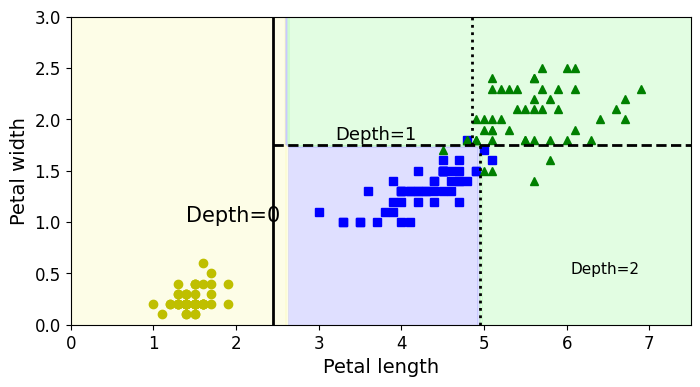

In [150]:
from matplotlib.colors import ListedColormap



def plot_decision_boundary(tree_clf_g3, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graphg3 = tree_clf_g3.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graphg3, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graphg3, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_g3, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

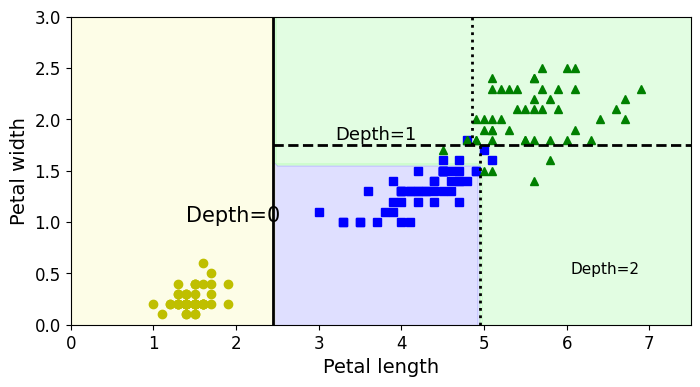

In [151]:

from matplotlib.colors import ListedColormap



def plot_decision_boundary(tree_clf_e3, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graphe3 = tree_clf_e3.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graphe3, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graphe3, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_e3, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

In [152]:
# Changing depth to 4

# Gini
tree_clf_g4 = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
tree_clf_g4.fit(X_train, y_train)

# Entropy
tree_clf_e4 = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
tree_clf_e4.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [153]:
# Create the 7 fold cv
kf7 = KFold(n_splits=7, random_state=None, shuffle=True)

kf7.get_n_splits(X)

7

In [154]:
# Validate output on the tree with depth 4

for train_index, test_index in kf7.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_g4.fit(X_train, y_train)

    y_pred7 = tree_clf_g4.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred7, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.67      0.80         6

    accuracy                           0.91        22
   macro avg       0.93      0.89      0.89        22
weighted avg       0.93      0.91      0.91        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.89      0.94         9
   virginica       0.80      1.00      0.89         4

    accuracy        

In [155]:
# Validate output on the tree with depth 4
for train_index, test_index in kf7.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_e4.fit(X_train, y_train)

    y_prede7 = tree_clf_e4.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_prede7, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.75      0.75      0.75         4
   virginica       0.86      0.86      0.86         7

    accuracy                           0.91        22
   macro avg       0.87      0.87      0.87        22
weighted avg       0.91      0.91      0.91        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.83      0.91         6

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00         6

    accuracy        

Graph for Depth 4 both Gini and Entropy

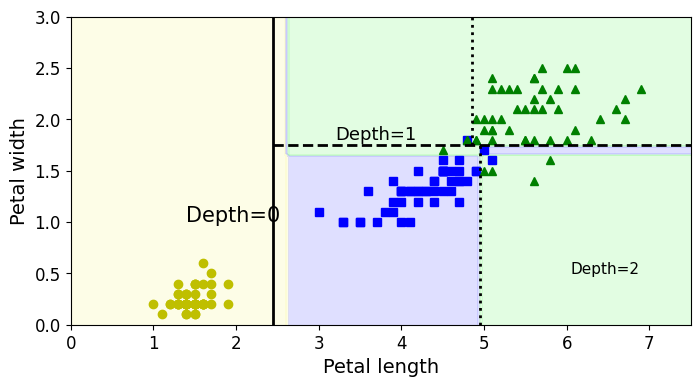

In [156]:

from matplotlib.colors import ListedColormap



def plot_decision_boundary(tree_clf_g4, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graphg4 = tree_clf_g4.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graphg4, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graphg4, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_g4, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

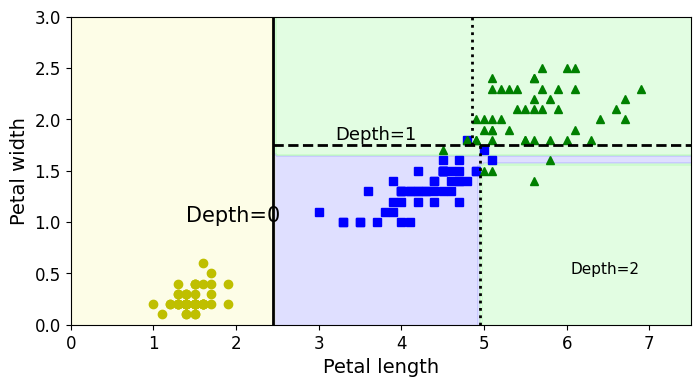

In [157]:

from matplotlib.colors import ListedColormap



def plot_decision_boundary(tree_clf_e4, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graphe4 = tree_clf_e4.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graphe4, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graphe4, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_e4, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

In [158]:
# Changing depth to 5

# Gini
tree_clf_g5 = DecisionTreeClassifier(max_depth=5, criterion="gini", random_state=42)
tree_clf_g5.fit(X_train, y_train)

# Entropy
tree_clf_e5 = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)
tree_clf_e5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [159]:
# Create the 10 fold cv
kf10 = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 5 folds

kf10.get_n_splits(X)

10

In [160]:
# Validate output on the tree with depth 5

for train_index, test_index in kf10.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_g5.fit(X_train, y_train)

    y_pred10 = tree_clf_g5.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred10, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      0.80      0.89         5
   virginica       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.95      0.93      0.94        15
weighted avg       0.94      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.93      0.94        15
weighted avg       0.94      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         6

    accuracy        

In [161]:
# Validate output on the tree with depth 5
for train_index, test_index in kf10.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_e5.fit(X_train, y_train)

    y_prede10 = tree_clf_e5.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_prede10, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.88      0.93         8
   virginica       0.67      1.00      0.80         2

    accuracy                           0.93        15
   macro avg       0.89      0.96      0.91        15
weighted avg       0.96      0.93      0.94        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.80      0.80      0.80         5
   virginica       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.88      0.88      0.88        15
weighted avg       0.87      0.87      0.87        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         2
   virginica       1.00      1.00      1.00         7

    accuracy        

Graph for Depth 5 both Gini and Entropy

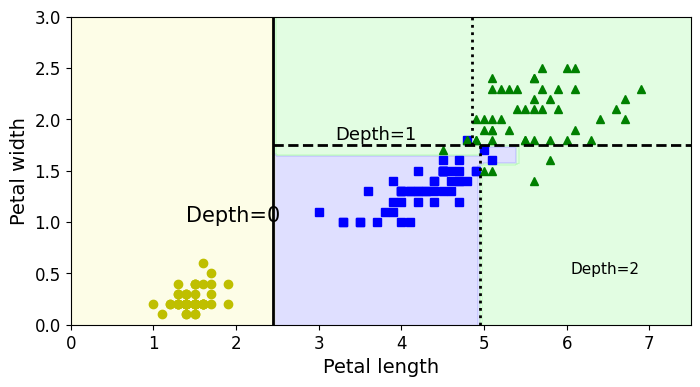

In [162]:

from matplotlib.colors import ListedColormap



def plot_decision_boundary(tree_clf_g5, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_g5 = tree_clf_g5.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_g5, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_g5, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_g5, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

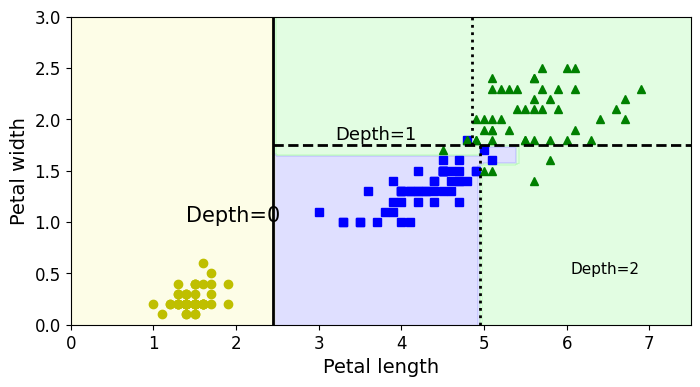

In [163]:

from matplotlib.colors import ListedColormap



def plot_decision_boundary(tree_clf_e5, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_ge5 = tree_clf_e5.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_ge5, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_ge5, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_e5, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

#Conclusion and Difficulties Faced
Decisions trees gain better pattern learning abilities when also achieve higher levels of depth which improves their predictive accuracy. Higher depths in decision trees often produce overfitting behavior because they identify random patterns instead of main statistical relationships which reduces their effectiveness on new data samples. The process of boosting k-fold cross-validation makes the evaluation more robust yet it amplifies the processing time needed for decision making functions. The time required for training increases as k-value becomes higher since more training iterations are needed primarily due to large datasets. When running multiple folds with minimal data available it becomes possible to leak training information between splits which creates artificial performance improvements. The combination of depth value at 3 and k parameter at 5 proved to be the most suitable approach for striking an equilibrium between model accuracy and conceptual generalization.  


The adjustments made to depth or k hyperparameters led to different outcomes which needed extensive manual testing during the parameter tuning phase. Feature selection caused difficulties because selecting correct features for the tree had direct implications on model performance. The task of selecting the best setup became complicated because precision and recall scores changed when different k values were used for interpretation of model performance metrics. Small data shuffling within cross-validation made it difficult to achieve result reproducibility in multiple runs.